<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-LuisHermenegildo1/blob/main/TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

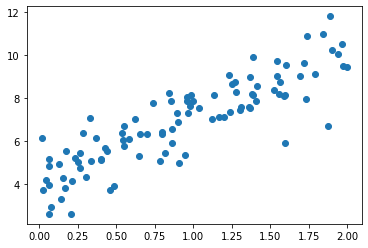

In [11]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [12]:
import pandas as pd
pd.DataFrame(y)

,0
0,4.192372
1,5.294725
2,7.630082
3,9.015930
4,8.994965
...,...
95,2.629206
96,8.734909
97,8.585343
98,5.187527


In [13]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

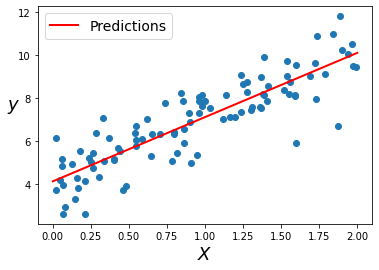

In [14]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [15]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [16]:
X_new.shape

(2, 1)

In [17]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 4.13277588],
       [10.10083907]])

In [19]:
 linear_reg.coef_, linear_reg.intercept_

(array([[2.9840316]]), array([4.13277588]))

The model estimates:

$\hat{y} = 2.98X + 4.13$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [20]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

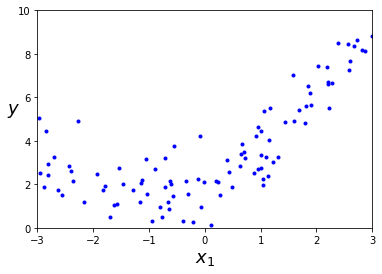

In [21]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [22]:
import pandas as pd
pd.DataFrame(y)

,0
0,0.945691
1,4.443143
2,1.192742
3,2.931855
4,2.061668
...,...
95,1.203092
96,5.604541
97,2.110103
98,2.216841


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [34]:
X_poly[:10]

array([[-6.69205185e-02,  4.47835579e-03],
       [ 1.00118555e+00,  1.00237250e+00],
       [-2.16209247e+00,  4.67464386e+00],
       [-2.82015846e+00,  7.95329374e+00],
       [-1.15242035e+00,  1.32807266e+00],
       [ 1.22808458e+00,  1.50819173e+00],
       [-1.78887929e+00,  3.20008910e+00],
       [ 1.04059460e+00,  1.08283712e+00],
       [ 2.81947228e+00,  7.94942392e+00],
       [-2.43659571e+00,  5.93699863e+00]])

`X_poly` now contains the original feature of X plus the square of the feature:

In [24]:
print(X[0])
print(X[0]*X[0])


[-0.06692052]
[0.00447836]


In [25]:
X_poly[0]

array([-0.06692052,  0.00447836])

Fit the model to this extended training data:

In [36]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.00488344, 0.47987411]]), array([2.09681576]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

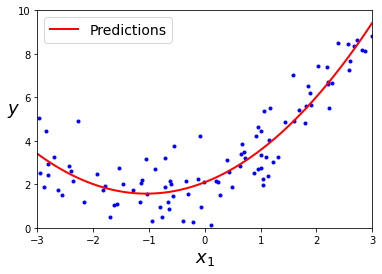

In [31]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [67]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
290,3.747925,37.007626
79,2.625373,51.897588
825,5.633084,37.180147
145,3.088650,46.144957
179,3.224625,41.447674
323,3.885967,42.963877
457,4.302010,34.948823
129,3.005871,43.475365
36,2.052317,47.885556


In [68]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [39]:
len(X)

1000

In [69]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

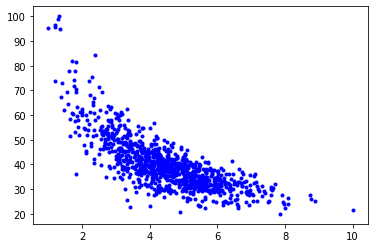

In [70]:
plt.plot(X,y,'b.')

**Importamos las librerias necesarias**

In [104]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

**Subdividimos nuestros datos en entrenamiento y prueba**

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

**Entrenamos el modelo**

In [87]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

**Visualizamos el modelo**

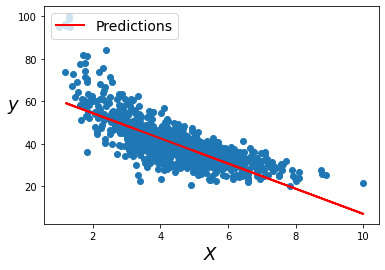

In [90]:
# construct best fit line
#X_fit = np.linspace(0, 2, 100)
y_pred = linear_reg.predict(X_test)

plt.scatter(X, y)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [92]:
y_pred[:10]

array([36.79615763, 34.41647519, 29.46368924, 46.53332312, 38.29165905,
       33.48519153, 36.60009332, 34.65304346, 41.4320562 , 40.01524372])

**Mostramos la pendiente, la intercepción y la ecuación**

In [93]:
linear_reg.coef_, linear_reg.intercept_

(array([-5.92233474]), 66.2733684576601)

In [101]:
print(f"Y^= {linear_reg.coef_}X + {linear_reg.intercept_}")

Y^= [-5.92233474]X + 66.2733684576601


**Mostramos los errores**

In [103]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 5.3242742719303395
Root Mean Squared Error: 7.809926546389283
r2_score 0.5317236137342649


In [ ]:
#polinomial

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
#tu codigo aquí